In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('pl_fullstat_20-21.csv')
del df['Unnamed: 0']

In [3]:
df.head(5)

Teams  Position-1  Goals_For-1  Goal_Against-1  Points-1  \
0                  Arsenal         1.0          3.0             0.0       3.0   
1           Leicester City         2.0          3.0             0.0       3.0   
2                  Chelsea         3.0          3.0             1.0       3.0   
3         Newcastle United         4.0          2.0             0.0       3.0   
4  Wolverhampton Wanderers         5.0          2.0             0.0       3.0   

   Position-2  Goals_For-2  Goal_Against-2  Points-2  Position-3  ...  \
0           3            5               1         6           5  ...   
1           1            7               2         6           1  ...   
2          11            3               3         3           9  ...   
3          13            2               3         3          10  ...   
4          12            3               3         3          16  ...   

   Goal_Against-36  Points-36  Position-37  Goals_For-37  Goal_Against-37  \
0               38         55            9            53               39   
1               44         66            5            66               46   
2               33         64            3            57               34   
3               62         39           15            44               62   
4               49         45           12            35               50   

   Points-37  Position-38  Goals_For-38  Goal_Against-38  Points-38  
0         58            8            55               39         61  
1         66            5            68               50         66  
2         67            4            58               36         67  
3         42           12            46               62         45  
4         45           13            36               52         45  

[5 rows x 153 columns]

## Plot Points vs Gameweeks

In [4]:
points_df = df[['Teams']+[f'Points-{gw}' for gw in range(1,39)]]

In [5]:
points_df.head()

Teams  Points-1  Points-2  Points-3  Points-4  Points-5  \
0                  Arsenal       3.0         6         6         9         9   
1           Leicester City       3.0         6         9         9         9   
2                  Chelsea       3.0         3         4         7         8   
3         Newcastle United       3.0         3         4         7         7   
4  Wolverhampton Wanderers       3.0         3         3         6         9   

   Points-6  Points-7  Points-8  Points-9  ...  Points-29  Points-30  \
0         9        12        12        13  ...         42         42   
1        12        15        18        18  ...         56         56   
2         9        12        15        18  ...         51         51   
3         8        11        11        11  ...         28         29   
4        10        13        13        14  ...         35         35   

   Points-31  Points-32  Points-33  Points-34  Points-35  Points-36  \
0         45         46         46         49         55         55   
1         56         59         62         63         66         66   
2         54         55         58         61         64         64   
3         32         35         36         36         39         39   
4         38         41         41         42         45         45   

   Points-37  Points-38  
0         58         61  
1         66         66  
2         67         67  
3         42         45  
4         45         45  

[5 rows x 39 columns]

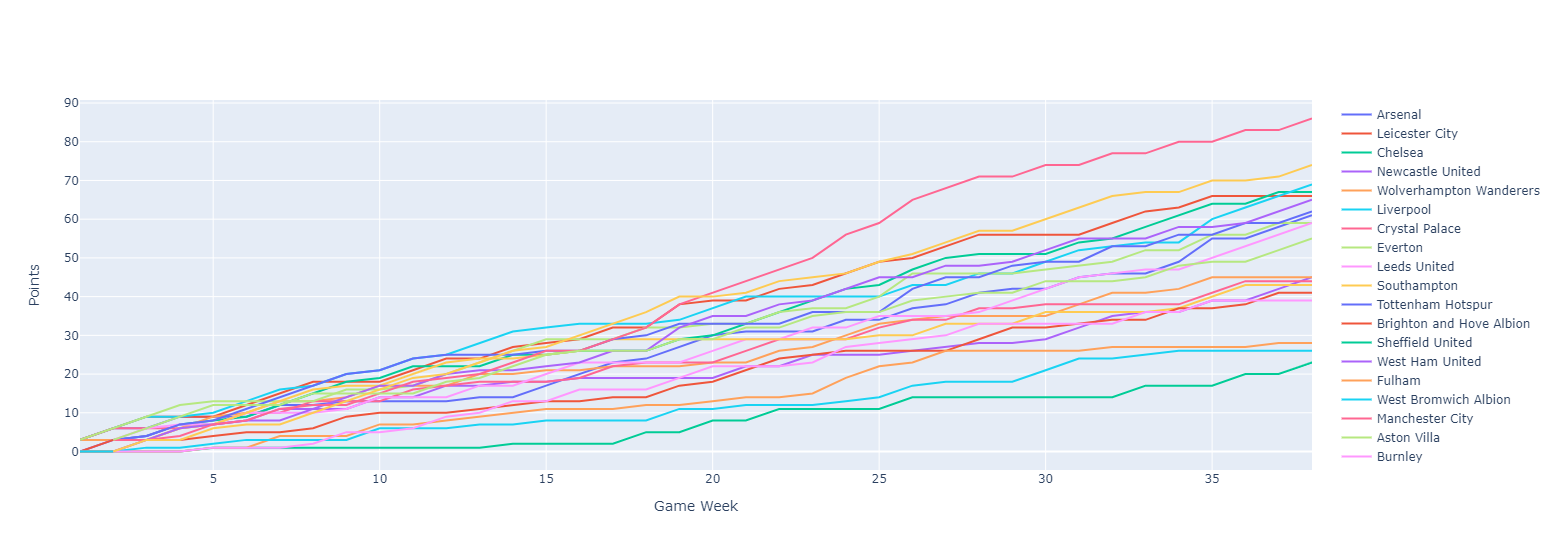

In [6]:
fig = go.Figure()
x = list(range(1,39))
for team in points_df['Teams']:
    y = points_df[points_df['Teams'] == team].iloc[0,1:]
    fig.add_trace(go.Scatter(x=x, y=y, 
                             name = team))
    
fig.update_yaxes(title='Points')
fig.update_xaxes(title='Game Week')
fig.update_layout(width = 1500, height = 550)

## Position vs Gameweeks

In [7]:
pos_df = df[['Teams']+[f'Position-{gw}' for gw in range(1,39)]]

In [8]:
pos_df.head()

Teams  Position-1  Position-2  Position-3  Position-4  \
0                  Arsenal         1.0           3           5           4   
1           Leicester City         2.0           1           1           3   
2                  Chelsea         3.0          11           9           7   
3         Newcastle United         4.0          13          10           9   
4  Wolverhampton Wanderers         5.0          12          16          13   

   Position-5  Position-6  Position-7  Position-8  Position-9  ...  \
0           5          11           9          11          12  ...   
1           4           4           2           1           4  ...   
2           8          10           7           5           3  ...   
3          13          14          11          13          15  ...   
4           6           9           6           9           9  ...   

   Position-29  Position-30  Position-31  Position-32  Position-33  \
0            9           10            9            9           10   
1            3            3            3            3            3   
2            4            5            5            4            4   
3           17           17           17           15           16   
4           13           14           12           12           12   

   Position-34  Position-35  Position-36  Position-37  Position-38  
0            9            9            9            9            8  
1            3            3            3            5            5  
2            4            4            4            3            4  
3           17           16           16           15           12  
4           12           12           12           12           13  

[5 rows x 39 columns]

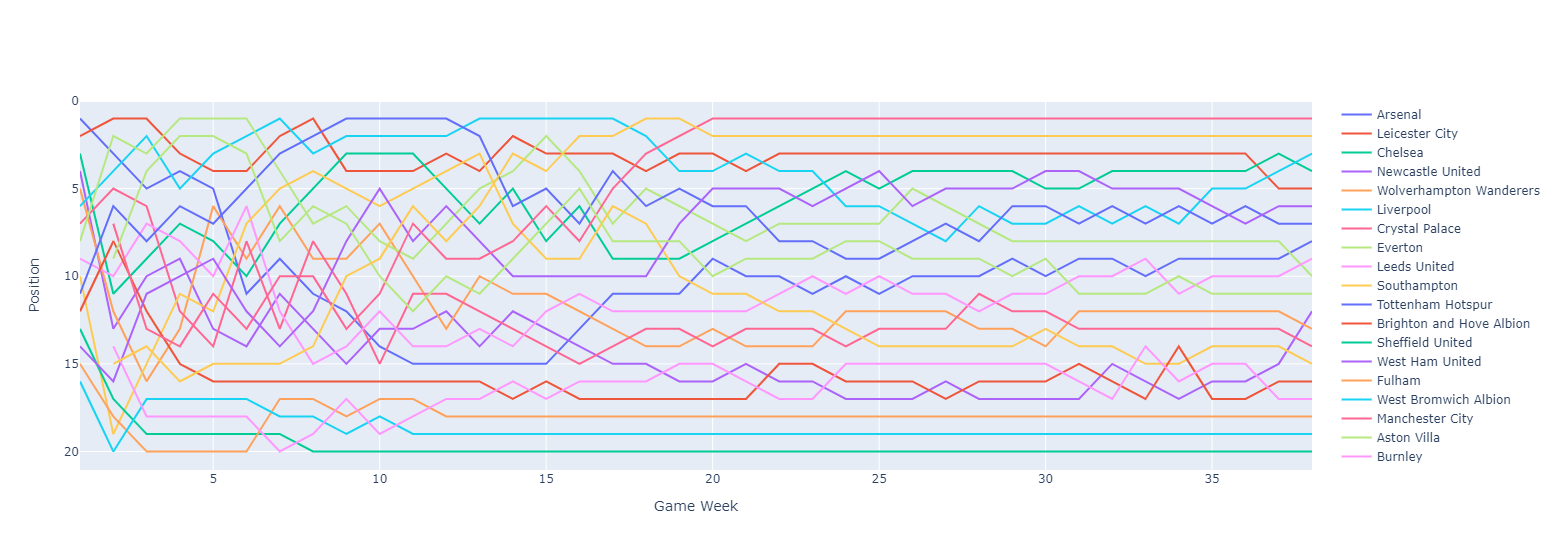

In [9]:
fig = go.Figure()
x = list(range(1,39))
for team in pos_df['Teams']:
    y = pos_df[points_df['Teams'] == team].iloc[0,1:]
    fig.add_trace(go.Scatter(x=x, y=y, 
                             name = team))
    
fig.update_yaxes(autorange='reversed', title='Position')
fig.update_xaxes(title='Game Week')
fig.update_layout(width = 1500, height = 550)

## Goals vs Gameweeks

In [10]:
goals_df = df[['Teams']+[f'Goals_For-{gw}' for gw in range(1,39)]]

In [11]:
goals_df.head()

Teams  Goals_For-1  Goals_For-2  Goals_For-3  \
0                  Arsenal          3.0            5            6   
1           Leicester City          3.0            7           12   
2                  Chelsea          3.0            3            6   
3         Newcastle United          2.0            2            3   
4  Wolverhampton Wanderers          2.0            3            3   

   Goals_For-4  Goals_For-5  Goals_For-6  Goals_For-7  Goals_For-8  \
0            8            8            8            9            9   
1           12           12           13           17           18   
2           10           13           13           16           20   
3            6            7            8           10           10   
4            4            5            6            8            8   

   Goals_For-9  ...  Goals_For-29  Goals_For-30  Goals_For-31  Goals_For-32  \
0            9  ...            40            40            43            44   
1           18  ...            53            53            55            58   
2           22  ...            44            46            50            50   
3           10  ...            28            30            32            35   
4            9  ...            28            30            31            32   

   Goals_For-33  Goals_For-34  Goals_For-35  Goals_For-36  Goals_For-37  \
0            44            46            50            50            53   
1            60            61            65            65            66   
2            51            53            55            55            57   
3            36            36            40            43            44   
4            32            33            35            35            35   

   Goals_For-38  
0            55  
1            68  
2            58  
3            46  
4            36  

[5 rows x 39 columns]

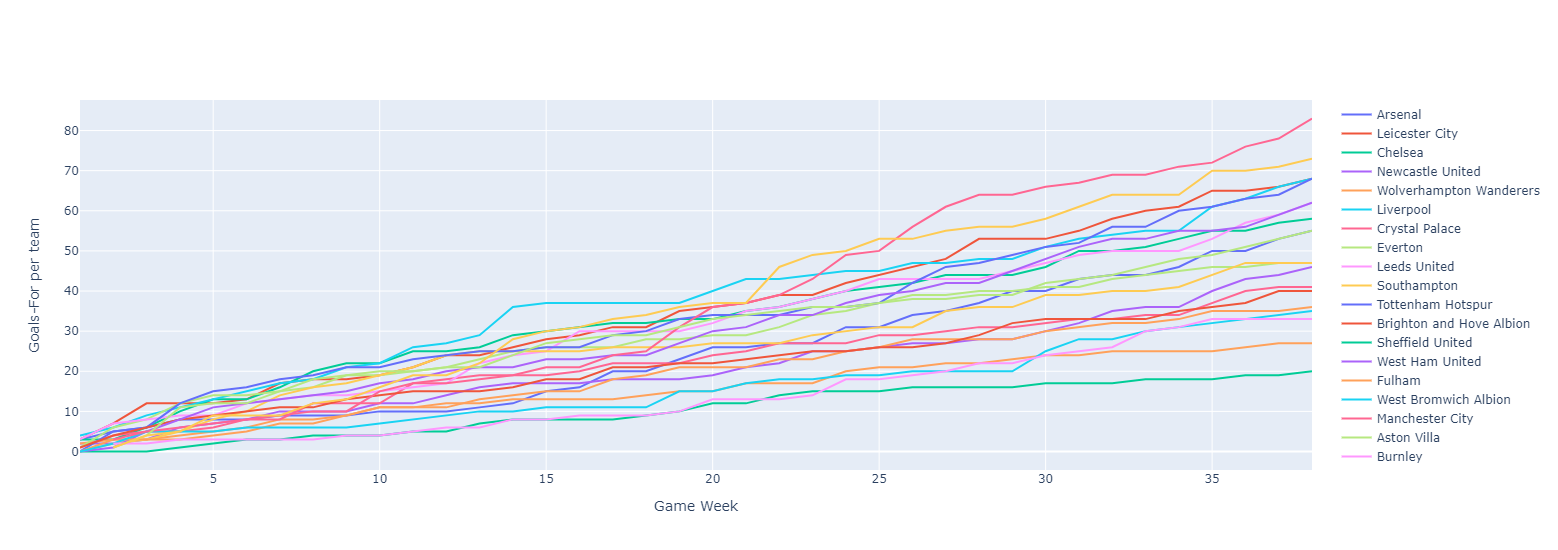

In [12]:
fig = go.Figure()
x = list(range(1,39))
for team in goals_df['Teams']:
    y = goals_df[goals_df['Teams'] == team].iloc[0,1:]
    fig.add_trace(go.Scatter(x=x, y=y, 
                             name = team))
    
fig.update_yaxes(title='Goals-For per team')
fig.update_xaxes(title='Game Week')
fig.update_layout(width = 1500, height = 550)

## Combined Stat

In [13]:
clubs = ['Manchester City', 'Manchester United']

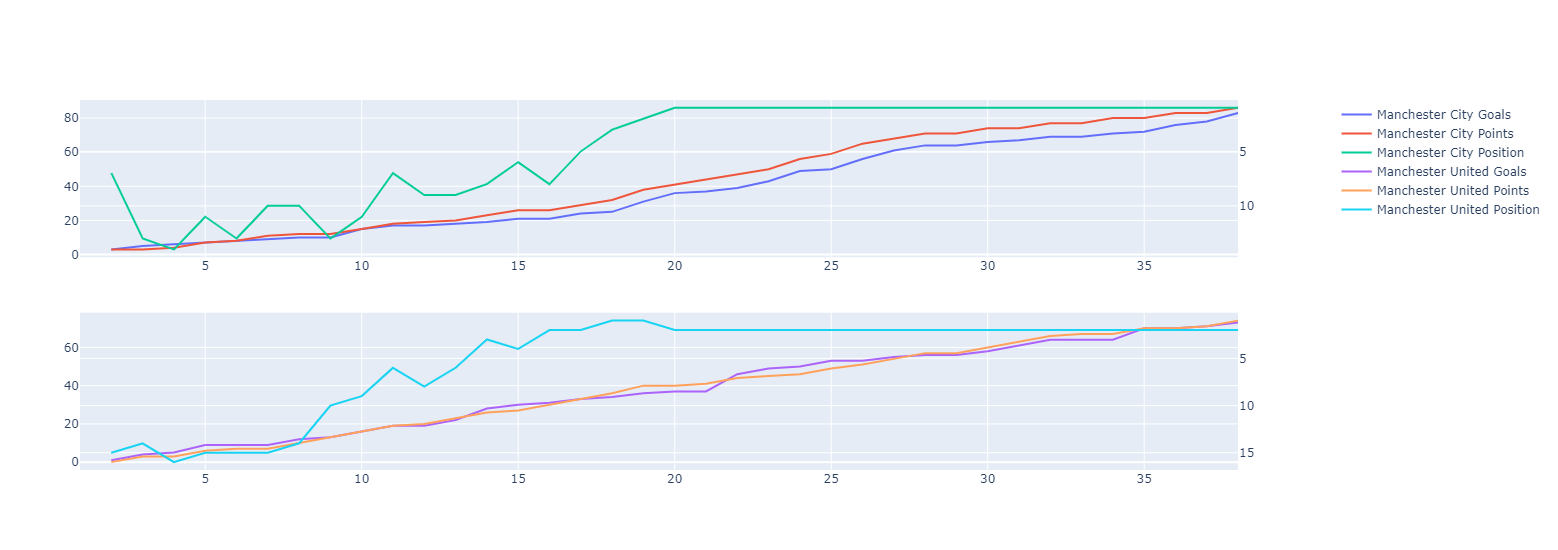

In [14]:
fig = make_subplots(rows=2, cols=1, specs=[[{"secondary_y": True}], 
                                           [{"secondary_y": True}]])

x = list(range(1,39))
for i, club in enumerate(clubs):
    fig.add_trace(go.Scatter(x = x, y = goals_df[goals_df['Teams'] == club].iloc[0,1:], name = f'{club} Goals'), 
                  row=i+1, col=1)
    fig.add_trace(go.Scatter(x = x, y = points_df[points_df['Teams'] == club].iloc[0,1:], name = f'{club} Points'), 
                  row=i+1, col=1)
    fig.add_trace(go.Scatter(x = x, y = pos_df[pos_df['Teams'] == club].iloc[0,1:], name = f'{club} Position'), 
                  row=i+1, col=1, secondary_y=True)
    fig.update_yaxes(secondary_y=True, autorange = 'reversed')

fig.update_layout(width = 1500, height = 550)

## Creating DropDowns

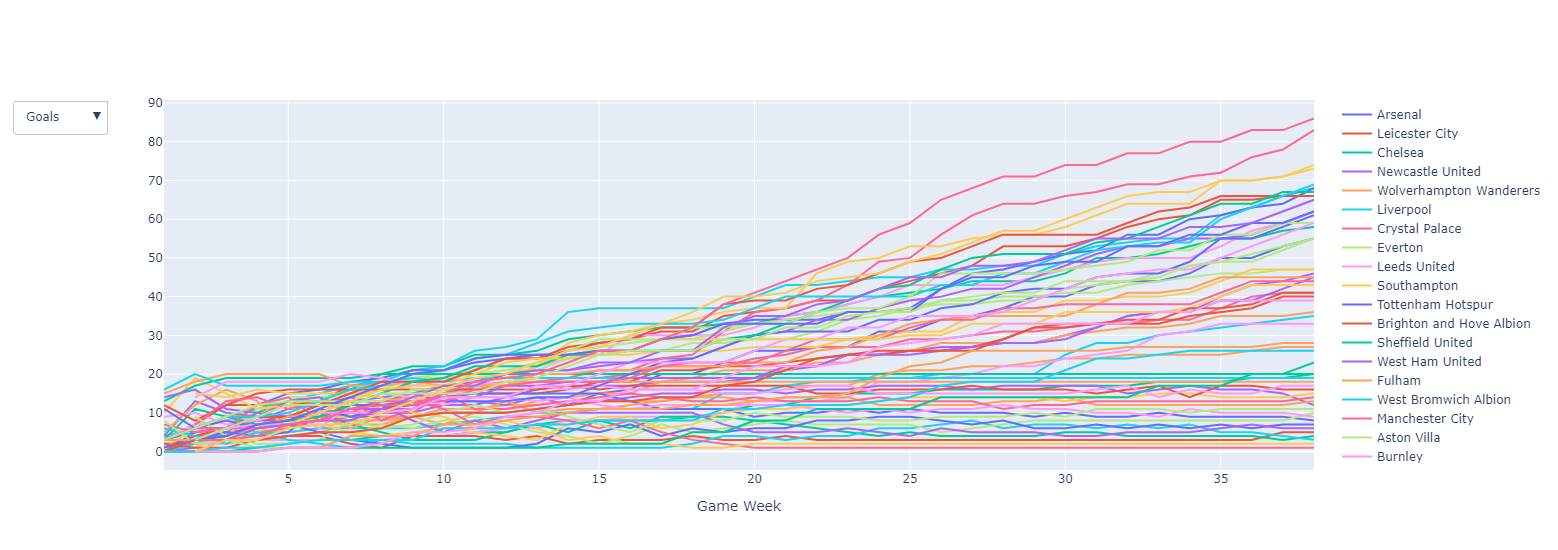

In [15]:
fig = go.Figure()
x = list(range(1,39))

for team in goals_df['Teams']:
    y = goals_df[goals_df['Teams'] == team].iloc[0,1:]
    fig.add_trace(go.Scatter(x=x, y=y, 
                             name = team))

for team in pos_df['Teams']:
    y = pos_df[pos_df['Teams'] == team].iloc[0,1:]
    fig.add_trace(go.Scatter(x=x, y=y, 
                             name = team))

for team in points_df['Teams']:
    y = points_df[points_df['Teams'] == team].iloc[0,1:]
    fig.add_trace(go.Scatter(x=x, y=y, 
                             name = team))
fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=None,
        buttons=list(
            [dict(label = 'Goals',
                  method = 'update',
                  args = [{'visible': [True for i in range(20)] + [False for i in range(20)] + [False for i in range(20)]},
                          {'title': 'Goals Trend', 'showlegend':True, 'yaxis': {'title': 'Goals'}}]),
             dict(label = 'Positions',
                  method = 'update',
                  args = [{'visible': [False for i in range(20)] + [True for i in range(20)] + [False for i in range(20)]}, # the index of True aligns with the indices of plot traces
                          {'title': 'Position Trend', 'showlegend':True, 'yaxis': {'title': 'Position', 'autorange':'reversed'}}]),
             dict(label = 'Points',
                  method = 'update',
                  args = [{'visible': [False for i in range(20)] + [False for i in range(20)] + [True for i in range(20)]},
                          {'title': 'Points Trend', 'showlegend':True, 'yaxis': {'title': 'Points'}}])
            ])
        )
    ])

fig.update_xaxes(title='Game Week')
fig.update_layout(width = 1500, height = 550)

---

In [23]:
clubs = ['Manchester United', 'Manchester City', 'Arsenal', 'Chelsea', 'Liverpool', 'Tottenham Hotspur', 'Everton', 'Leicester City']

def btn_choice(club):
    bool_list = [[True] * 3 if club == c else [False] * 3 for c in clubs]
    vis_list = [x for sublist in bool_list for x in sublist]
    return vis_list

buttons_list = [dict(label=club, method='update', args=[{'visible':btn_choice(club)}, {'title': club, 'showlegend': True}]) for club in clubs]

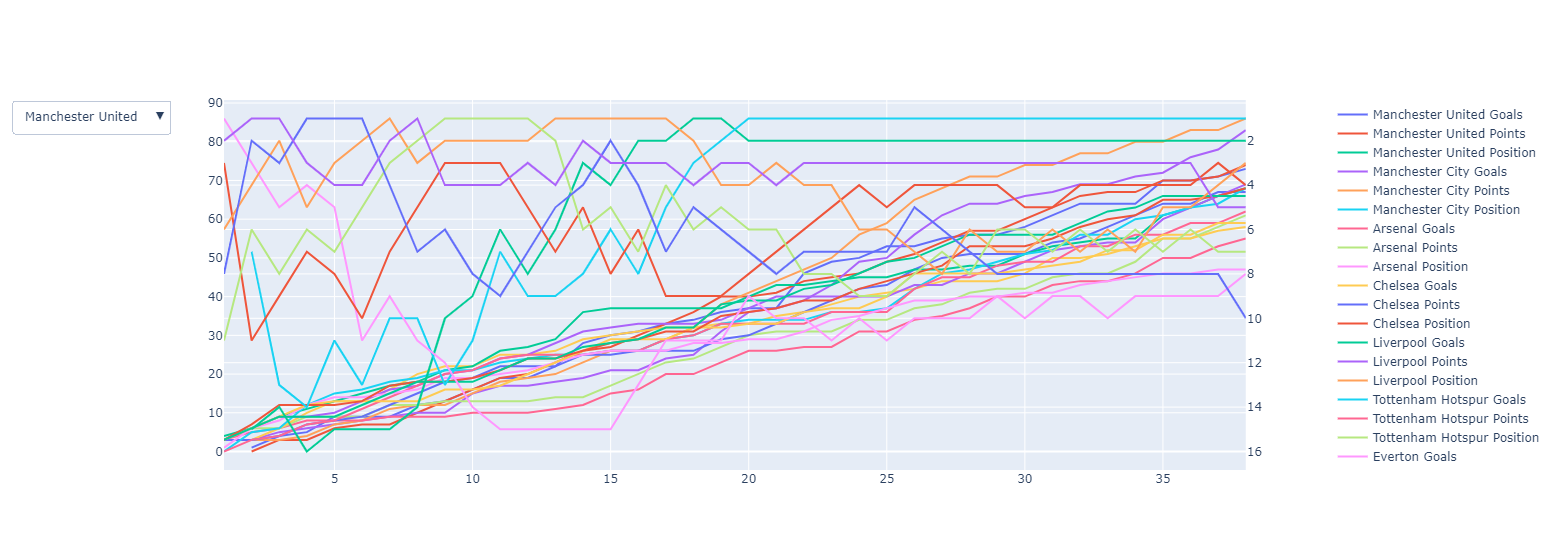

In [25]:
x = list(range(1,39))
fig = make_subplots(rows=1, cols=1, specs=[[{"secondary_y": True}]])
for club in clubs:
    fig.add_trace(go.Scatter(x = x, y = goals_df[goals_df['Teams'] == club].iloc[0,1:], name = f'{club} Goals'))
    fig.add_trace(go.Scatter(x = x, y = points_df[points_df['Teams'] == club].iloc[0,1:], name = f'{club} Points'))
    fig.add_trace(go.Scatter(x = x, y = pos_df[pos_df['Teams'] == club].iloc[0,1:], name = f'{club} Position'), 
                  secondary_y=True)
    fig.update_yaxes(secondary_y=True, autorange = 'reversed')

fig.update_layout(updatemenus=[go.layout.Updatemenu(active=0, buttons=buttons_list)])
fig.update_layout(width = 1500, height = 550)